In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Simulate SIR stochastic dynamics
Code from: http://epirecip.es/epicookbook/chapters/sir-stochastic-discretestate-discretetime/python  
Aim: visualise epidemic time series

In [4]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
def sir(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery]

def simulate():
    parms = [0.7, 0.3, 0.0, 1000.0, 0.1]
    tf = 50
    tl = 501
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    u = [999,1,0]
    S[0],I[0],R[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j] = u
    return {'t':t,'S':S,'I':I,'R':R}


In [24]:
sir_out = pd.DataFrame(simulate())

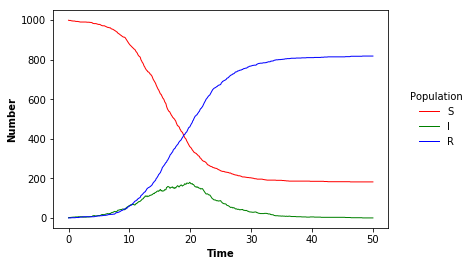

In [26]:
fig = plt.figure()
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=1)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=1)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=1)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
fig.savefig("/Users/daniele.proverbio/Documents/PHD_Lussemburgo/PHD/Group-Meetings/2021_02_17_groupMeeting/simulation_SIR.pdf",bbox_inches = "tight",transparent=True)
